## cifar10 Dataset (32*32 pixel)
<IMG src="cifar10_images.jpg" width="400" height="400">

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1, )

In [6]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [7]:
image_categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(image_categories[y[index]])

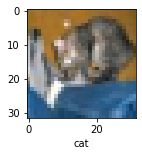

In [9]:
plot_sample(X_test, y_test, 0)

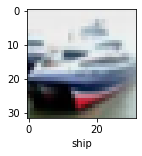

In [10]:
plot_sample(X_test, y_test, 1)

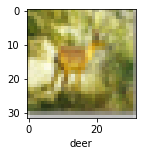

In [11]:
plot_sample(X_test, y_test, 500)

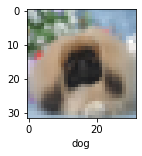

In [12]:
plot_sample(X_test, y_test, 250)

## Normalization

In [13]:
#We divide the dataset by 255 because every pixel consist of 0-255
X_train = X_train / 255
X_test = X_test / 255

## Convolutional Neural Network(CNN) Design of Deep Learning Algorithm

In [15]:
deep_learning_model = models.Sequential([
    #
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), layers.MaxPooling2D((2,2)),
    #
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [16]:
deep_learning_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [18]:
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4467 - accuracy: 0.4816
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0882 - accuracy: 0.6211
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9530 - accuracy: 0.6691
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8585 - accuracy: 0.7037
Epoch 5/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7864 - accuracy: 0.7263


In [19]:
deep_learning_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9297 - accuracy: 0.6858


[0.9297131896018982, 0.6858000159263611]

In [20]:
y_prediction = deep_learning_model.predict(X_test)
y_prediction[:3]

array([[9.3334960e-03, 1.5531034e-03, 5.2576973e-03, 4.9371839e-01,
        7.3465880e-04, 2.3022017e-01, 7.5991154e-03, 2.3274921e-04,
        2.4826744e-01, 3.0831690e-03],
       [2.1609150e-02, 1.5736599e-01, 2.0475849e-04, 2.1495864e-06,
        7.3866781e-06, 3.2100971e-08, 7.5230156e-07, 1.3593605e-07,
        8.2044941e-01, 3.6019130e-04],
       [1.2843896e-01, 1.8200411e-01, 5.8207004e-03, 1.3970147e-03,
        1.3330991e-03, 1.3133085e-04, 4.3379434e-04, 5.6266360e-04,
        6.6095835e-01, 1.8919919e-02]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_prediction]
y_classes[:3]

[3, 8, 8]

In [22]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

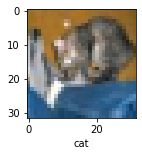

In [23]:
plot_sample(X_test, y_test, 0)

In [28]:
image_categories[y_classes[0]]

'cat'

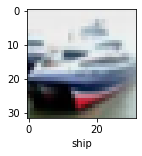

In [30]:
plot_sample(X_test, y_test, 1)

In [31]:
image_categories[y_classes[1]]

'ship'

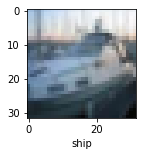

In [32]:
plot_sample(X_test, y_test, 2)